In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dds-dataset-malware/legit-dga_domains.csv


The first things I noticed when looking through the data set was that any .biz or .net domains tended to be marked as dga websites. Also the .csv
doesn't really come with much information other than the domains and the class columns to work with so this may be more of a quick analysis.

In [2]:
data = pd.read_csv("../input/dds-dataset-malware/legit-dga_domains.csv")

In [3]:
def domain_length_func(df):
    
    x = []
    for i in df['domain']:
        x.append(i)
    return len(x)
        
data['domain_length'] = data.apply(domain_length_func, axis = 1)

data

,host,domain,class,subclass,domain_length
0,000directory.com.ar,000directory,legit,legit,12
1,000webhost.com,000webhost,legit,legit,10
2,001fans.com,001fans,legit,legit,7
3,01-telecharger.com,01-telecharger,legit,legit,14
4,010shangpu.com,010shangpu,legit,legit,10
...,...,...,...,...,...
133921,zzsearch.net,zzsearch,legit,legit,8
133922,zzstream.li,zzstream,legit,legit,8
133923,zzu1icncjioj5i9gjr18vjr6c.org,zzu1icncjioj5i9gjr18vjr6c,dga,newgoz,25
133924,zzxsmfnvijtdxnvxytowkx.ru,zzxsmfnvijtdxnvxytowkx,dga,goz,22


The goal of the domain length function I have created above is to essentialy find the lengths of the domain of each website, since I believe that in general dga websites tend to have longer domains than legit websites.

I did this by first creating an empty array x which will be used to gather each character of the domain. I then created a for loop that searched for i in the data feed and had it appended to the empty array x. For some reason I had a lot of trouble of copying the string so instead I decided to just get the array length and plan to compare the averages later on in a bar chart.

In [4]:
data.groupby('class').size()

class
dga      52665
legit    81261
dtype: int64

In [5]:
data.groupby('subclass').size()

subclass
cryptolocker    34319
goz              7347
legit           81261
newgoz          10999
dtype: int64

With this code we can see that the subclasses of dga can be broken down to cryptolocker, goz, and newgoz. 

To clarify goz stands for Gameover Zeus which is a peer-to-peer (P2P) malware extension of the Zeus family that steals bank credentials and is a distributor for CryptoLocker ransomware. Cyber criminals use it to "filter" money away from banking customers. (https://www.knowbe4.com/gameover-zeus)

The point of this is that we can now see that the sub classes of dga are various types of malware extensions that can really put organizations at risk.

Another important detail I have found while looking through the data set is that the domain names seem to be a real big giveaway on whether a domain is legit or not. For example a typical domain names looks like "000directory", while a dga domain name looks like "10rx3m8xog6s91uigm2z1qbjxid"

<AxesSubplot:ylabel='subclass'>

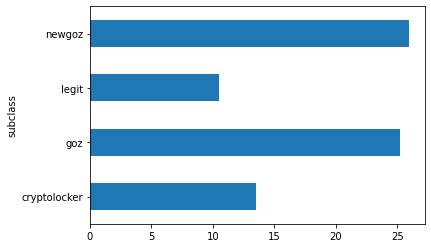

In [6]:
data.groupby('subclass').domain_length.mean().plot.barh()

Looking through the bar plot my assertions seem to be correct as on average the newgoz, goz, and crypto locker subclasses tended to overall have a higher character length than the legit subclass.

Findings:

Overall, even though there weren't many use cases for the data set we were still able to reach some very interesting findings.

1. In general domains such as (.biz and .net) tend to be red flags for dga websites. However, it is important to keep in mind that even a .com website can still be a dga website.
2. The domain can also be a big give away of a website being dga, as we can see longer domain names can be a red flag of a dga website as well.